In [2]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import KFold
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score

Epoch 1/20


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7458 - loss: 0.8480 - val_accuracy: 0.9430 - val_loss: 0.1885
Epoch 2/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9467 - loss: 0.1857 - val_accuracy: 0.9624 - val_loss: 0.1194
Epoch 3/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9651 - loss: 0.1193 - val_accuracy: 0.9689 - val_loss: 0.1033
Epoch 4/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9718 - loss: 0.0936 - val_accuracy: 0.9736 - val_loss: 0.0919
Epoch 5/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9790 - loss: 0.0718 - val_accuracy: 0.9750 - val_loss: 0.0856
Epoch 6/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9815 - loss: 0.0618 - val_accuracy: 0.9712 - val_loss: 0.0945
Epoch 7/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9846 - loss: 0.0502 - val_accuracy: 0.9776 - val_loss: 0.0761
Epoch 8/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9877 - loss: 0.0399 - val_accuracy: 0.9746 - val_

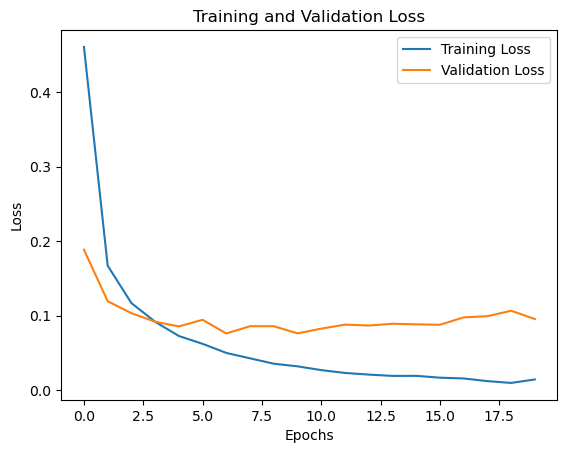

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 266us/step


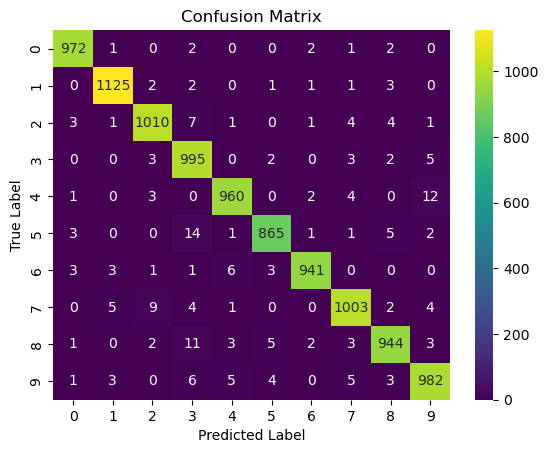

Training fold 1...


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Fold 1 - Validation Accuracy: 0.8993
Training fold 2...


Fold 2 - Validation Accuracy: 0.9029
Training fold 3...


Fold 3 - Validation Accuracy: 0.8969
Training fold 4...


Fold 4 - Validation Accuracy: 0.9032
Average Validation Accuracy: 0.9006


ValueError: File format not supported: filepath=model_fold_1. Keras 3 only supports V3 `.keras` files and legacy H5 format files (`.h5` extension). Note that the legacy SavedModel format is not supported by `load_model()` in Keras 3. In order to reload a TensorFlow SavedModel as an inference-only layer in Keras 3, use `keras.layers.TFSMLayer(model_fold_1, call_endpoint='serving_default')` (note that your `call_endpoint` might have a different name).

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import KFold
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils import to_categorical
from keras.datasets import mnist

# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Preprocess data (normalize and reshape)
X_train = X_train.reshape(-1, 784) / 255.0
X_test = X_test.reshape(-1, 784) / 255.0

# One-hot encode the labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Define the model
model = Sequential([
    Dense(128, activation='relu', input_shape=(784,)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dropout(0.25),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=256, validation_data=(X_test, y_test))

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Predict classes
y_pred_classes = np.argmax(model.predict(X_test), axis=1)
y_test_classes = np.argmax(y_test, axis=1)

# Confusion matrix
confusion_mtx = confusion_matrix(y_test_classes, y_pred_classes)

# Plot confusion matrix
sns.heatmap(confusion_mtx, annot=True, fmt="d", cmap="viridis")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()
from sklearn.model_selection import KFold
from keras.models import load_model
import numpy as np

# Create model function
def create_model():
    model = Sequential([
        Dense(128, activation="relu", input_shape=(784,)),
        Dense(128, activation="relu"),
        Dropout(0.25),
        Dense(10, activation="softmax")
    ])
    model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
    return model

# K-Fold Cross-Validation
kf = KFold(n_splits=4)
fold_no = 1
val_accuracies = []

# Train and validate using KFold
for train_index, val_index in kf.split(X_train):
    print(f'Training fold {fold_no}...')
    
    X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]
    
    model = create_model()
    model.fit(X_train_fold, y_train_fold, epochs=20, batch_size=512, verbose=0)
    
    # Evaluate on validation set
    _, val_accuracy = model.evaluate(X_val_fold, y_val_fold, verbose=0)
    val_accuracies.append(val_accuracy)
    print(f'Fold {fold_no} - Validation Accuracy: {val_accuracy:.4f}')
    
    model.save(f'model_fold_{fold_no}.h5')
    fold_no += 1

# Print average validation accuracy
print(f'Average Validation Accuracy: {np.mean(val_accuracies):.4f}')

# Evaluate on test set
test_accuracies = [load_model(f'model_fold_{fold}').evaluate(X_test, y_test, verbose=0)[1] for fold in range(1, 5)]
for i, acc in enumerate(test_accuracies, 1):
    print(f'Test Accuracy for Fold {i}: {acc:.4f}')